<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/Final/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1.** Load each json file into Python (obtaining a list of dictionaries for each) and perform the following: 

**a.**  discard any tweets that lack latitude (those without latitude will also lack longitude, and vice-versa)
 


In [3]:
import json

def read_json(path):
  """Read json file and convert to python dict"""
  with open(path) as file:
    return json.load(file)

america_latina = read_json('savedtweets_americalatina.json')
machine_learning = read_json('savedtweets_machinelearning.json')
super_league = read_json('savedtweets_superleague.json')
weibo = read_json('savedtweets_weibo.json')

In [4]:
for data in america_latina,machine_learning,super_league,weibo:
  print(f'Total tweets: {len(data)}') 

Total tweets: 100
Total tweets: 100
Total tweets: 100
Total tweets: 100


In [5]:
america_latina = [tweet for tweet in america_latina if tweet.get('latitude')]
machine_learning = [tweet for tweet in machine_learning  if tweet.get('latitude')]
super_league = [tweet for tweet in super_league  if tweet.get('latitude')]
weibo = [tweet for tweet in weibo  if tweet.get('latitude')]

In [6]:
for data in america_latina,machine_learning,super_league,weibo:
  print(f'Total tweets: {len(data)}') 

Total tweets: 44
Total tweets: 76
Total tweets: 51
Total tweets: 25


 b. Use the tweet-preprocessor to clean the text for each tweet using all available (default) options.
For each collection, save the modified list of tweets back into a new json file with the name prep_tweets_class#.json, where # matches the order of json files cited above (0=…americalatina, 1= …machinelearning, 2=..superleague, 3=weibo).  You should have files savedtweets_class0.json, savedtweets_class1.json, savedtweets_class2.json, and savedtweets_class3.json at the end of the process


In [7]:
!pip install tweet-preprocessor
import preprocessor as p
# Set all available options  to pre-processing
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG,
              p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.NUMBER)

# Option Name 	Option Short Code
# URL 	p.OPT.URL
# Mention 	p.OPT.MENTION
# Hashtag 	p.OPT.HASHTAG
# Reserved Words 	p.OPT.RESERVED
# Emoji 	p.OPT.EMOJI
# Smiley 	p.OPT.SMILEY
# Number 	p.OPT.NUMBER

def preprocess_tweets(tweet: dict) -> dict:
  """Preprocess tweets"""
  tweet['text'] = p.clean(tweet['text'])
  return tweet

def write_json(file_name, tweets):
  """Save  python dictionary as json file"""
  with open(file_name, 'w') as f:
    json.dump(tweets, f, indent=4)

In [8]:
json_list = [america_latina, machine_learning, super_league, weibo]

In [9]:
for count, json_data in enumerate(json_list):
  tweets = list(map(preprocess_tweets, json_data))
  write_json(f'savedtweets_class{count}.json', tweets)

**Part 2.** For each modified collection of tweets (i.e. after the transformation from part 1) calculate the # tweets with positive, negative, and neutral sentiment and depict these on a simple bar plot.  You should have 3 bars per plot (one bar for positive, one bar for negative, one bar for neutral), and 4 plots total (one per tweet query class).

In [10]:
from textblob import TextBlob
import pandas as pd


america_latina = read_json('savedtweets_class0.json')
machine_learning = read_json('savedtweets_class1.json')
super_league = read_json('savedtweets_class2.json')
weibo = read_json('savedtweets_class3.json')
tweet_list = [america_latina, machine_learning, super_league, weibo]
tweets_topics = ['America Latina Tweets', 'Machine Learning Tweets', 'Super League Tweets', 'Weibo Tweets']

In [11]:
def determine_setiment(tweets: dict) -> dict:
  """Determine tweet's sentiment"""
  sentiments = {'positive': 0, 
                       'neutral': 0,
                       'negative': 0}
  for tweet in tweets:
      blob = TextBlob(tweet['text'])
      if blob.sentiment.polarity > 0:
        sentiments['positive'] += 1
      elif blob.sentiment.polarity == 0:
        sentiments['neutral'] += 1
      else:
        sentiments['negative'] += 1
  return sentiments


def plot_bar(data, topic):
  """Plot tweets"""
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.figure(figsize=(6,3))
  plt.style.use('ggplot')

  x_val = data.keys()
  y_val = data.values()

  x_pos = [i for i, _ in enumerate(x_val)]

  plt.bar(x_pos, y_val, color=['green', 'grey', 'red'])
  plt.title(topic)
  plt.xlabel('Sentiments')
  plt.ylabel('Tweet volume')
  plt.xticks(x_pos, x_val)
  plt.show()

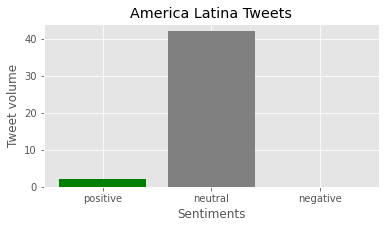

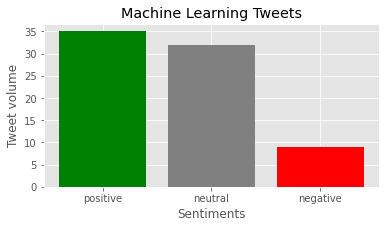

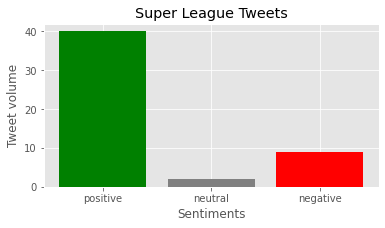

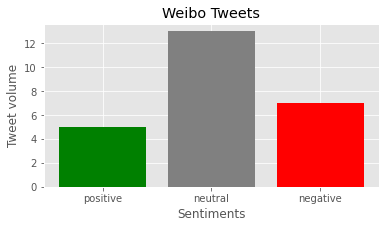

In [12]:
for tweets, topic in zip(tweet_list,tweets_topics):
  plot_bar(determine_setiment(tweets), topic)

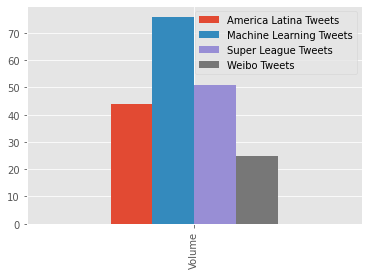

In [13]:
tweets_volum = {topic:len(tweets)for tweets, topic in zip(tweet_list, tweets_topics)}
pd.DataFrame(tweets_volum, index=['Volume']).plot.bar()

**Part 3.** Pool together all modified tweets into a single list, but maintain a combined secondary list of equal size that dictates the class (0, 1, 2, or 3) to which each tweet belongs.  Ex: If there are 44 América Latina tweets at the beginning of the pooled list of tweets, the first 44 elements of the secondary list should be 0.    

In [14]:
all_tweets = []
topics = []

for topic, tweets in enumerate(tweet_list):
  topics.extend([topic] * len(tweets))
  all_tweets.extend(tweets)

In [15]:
from collections import Counter
print(f'Topic counts: {dict(Counter(topics))}')

Topic counts: {0: 44, 1: 76, 2: 51, 3: 25}


In [16]:
print(f'Total tweets count: {len(all_tweets)}')

Total tweets count: 196


**Part 4.** Assume your combined lists each have a length of n.  Your next goal is to construct a n x 5 numpy feature array suited for machine learning, where each row matches the corresponding index in your lists, and the 5 columns represent the features for the tweet at that position as follows:

Feature 1: The length of the tweet’s text.

Feature 2: The tweet’s retweet count.

Feature 3: The tweet’s latitude.

Feature 4: The tweet’s longitude.

Feature 5: one of two values as follows: 0 if the tweet is in English, or 100 otherwise.

For example, the first row in your feature array may look like the below:


In [27]:
len(all_tweets)

196

In [33]:
import numpy as np 

# Initiate empty numpoy array
data = np.array([])
for tweet in all_tweets:
  lang =  1 if tweet['lang'] == 'en' else 100
  tweet_data = np.array([len(tweet['text']), tweet['retweet_count'], tweet['latitude'],
        tweet['longitude'], lang])
  if not np.size(data):
    # if numpy array size is zero insert horizontally
    data = np.hstack((data, tweet_data))
    continue
  # Append numpy array vertically
  data = np.vstack((data, tweet_data))

**Part 5.** Convert your secondary list of classes into an array, and then perform 10-fold cross-validation using three distinct classification estimators (either the ones we used in class, or those of your own choosing) to determine the accuracy available in using our features from part 4 in predicting the class of tweets.

In [37]:
# Convert python list to numpy array
topics = np.array(topics)
topics

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [38]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [40]:
models = {'KNeighborsClassifier': KNeighborsClassifier(),
          'GaussianNB': GaussianNB(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(max_iter=10000)}

for model_name, model in models.items():
  kfold_10 = KFold(n_splits=10, random_state=42, shuffle=True)
  scores = cross_val_score(estimator=model, X=data, y=topics, cv=kfold_10)
  print(f'{model_name:>20} '
        + f'Mean_accuracy: {scores.mean():.2%} '
        + f'Standard deviation: {scores.std():.2} ')

KNeighborsClassifier Mean_accuracy: 62.82% Standard deviation: 0.084 
          GaussianNB Mean_accuracy: 62.29% Standard deviation: 0.07 
                 SVC Mean_accuracy: 43.53% Standard deviation: 0.14 
  LogisticRegression Mean_accuracy: 67.21% Standard deviation: 0.075 


**Part 6.** Using the t-SNE estimator to compress our features into 2 dimensions, visualize the tweets on a scatter-plot with 4 different colors for 4 different classes.  Briefly comment (inline code comments are fine) on where you see distinct clusters of classes on the plot, and where you do not see any distinction.

In [51]:
from sklearn.manifold import TSNE

# Transform 5 features onto 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(data)
reduced_data.shape

(196, 2)

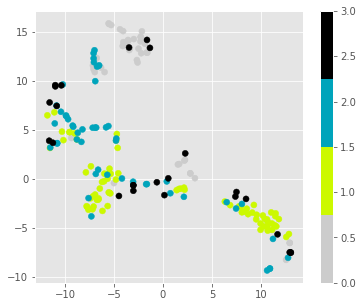

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure(figsize=(6,5))

dots = plt.scatter(reduced_data[:,0], reduced_data[:,1],
        c=topics, cmap=plt.cm.get_cmap('nipy_spectral_r', 4))

colorbar = plt.colorbar(dots)

# colorbar = plt.colorbar(dots, ticks=[0,1,2,3,4])

Based on the scatter plot, we can observed that tweets of America Latina and Machine learning are overlapping with other 3 classes. The other two topics are presented in each class. That explains why ML model predicted with low accurracy with highest score of 67.21%